<a href="https://colab.research.google.com/github/tarunpanda001/EDA/blob/main/Yulu_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definition of Problem:

Business Context: Yulu, a micro-mobility provider, wants to understand the factors affecting demand for shared electric cycles in India.

Objective: Identify significant variables (season, weather, workingday, holiday, temperature, humidity, windspeed) that influence daily rentals (count).

Dependent Variable: count – total electric cycles rented per day

Independent Variables: season, holiday, workingday, weather, temp, atemp, humidity, windspeed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency


# Load Dataset

In [5]:
yulu_data = pd.read_csv('bike_sharing.csv')

# Check shape and info

In [6]:
print(yulu_data.shape)

(10886, 12)


In [7]:
yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
print(yulu_data.isnull().sum())


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [9]:
yulu_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Convert categorical columns

In [10]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    yulu_data[col] = yulu_data[col].astype('category')

yulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


season, weather, holiday, workingday are categorical → converted to category type.

Continuous variables: temp, atemp, humidity, windspeed, count.

# Univariate Analysis

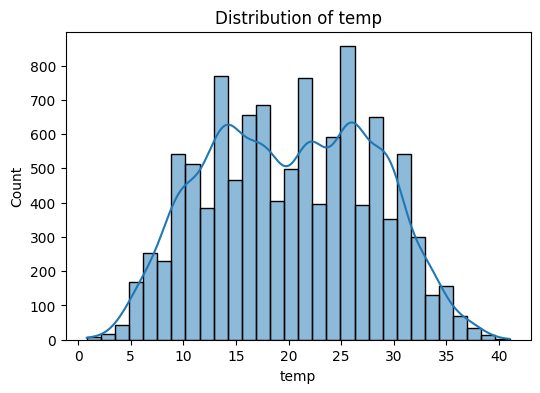

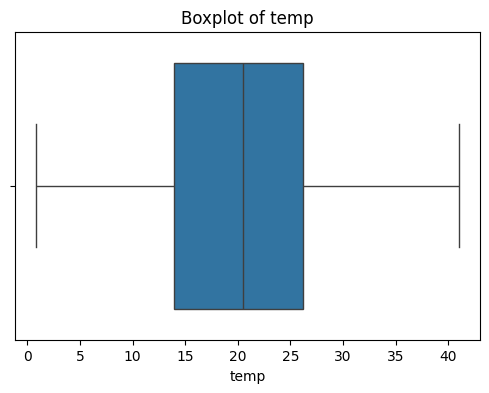

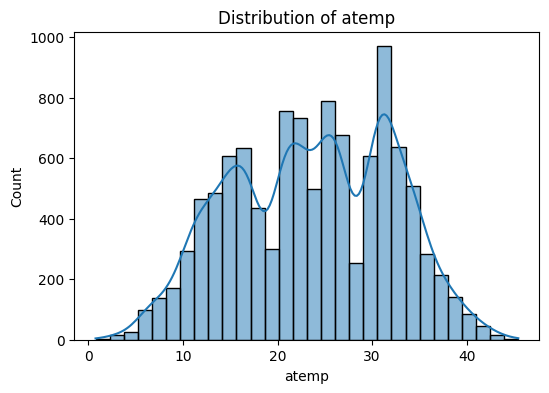

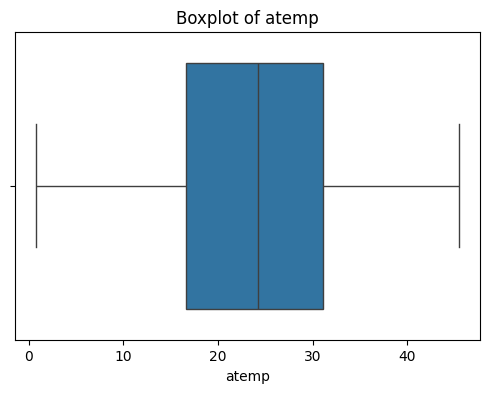

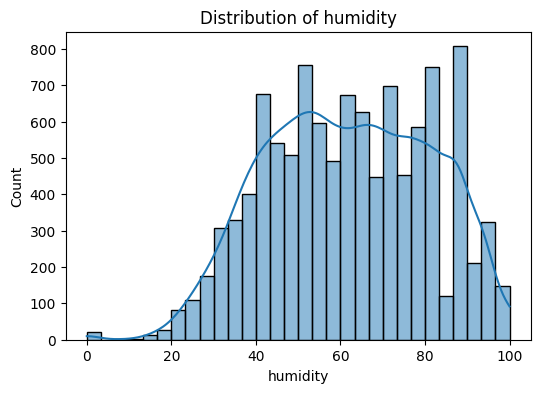

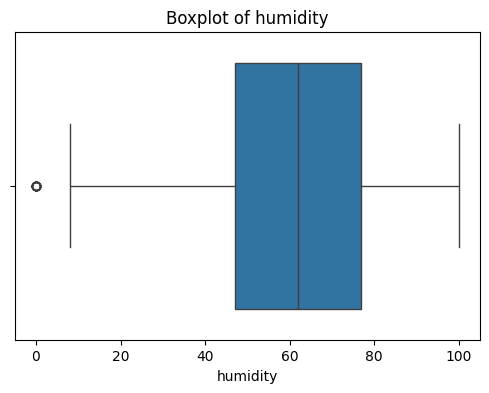

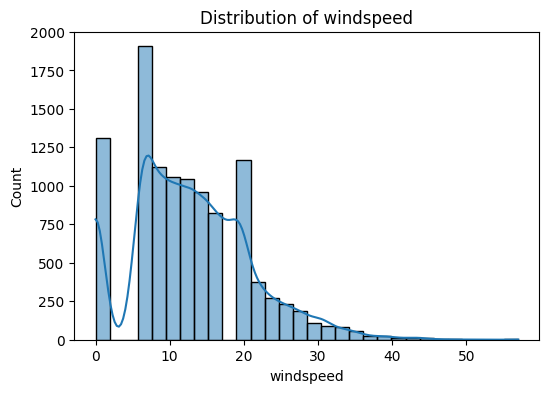

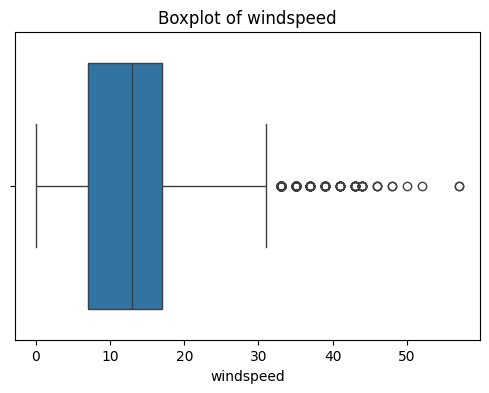

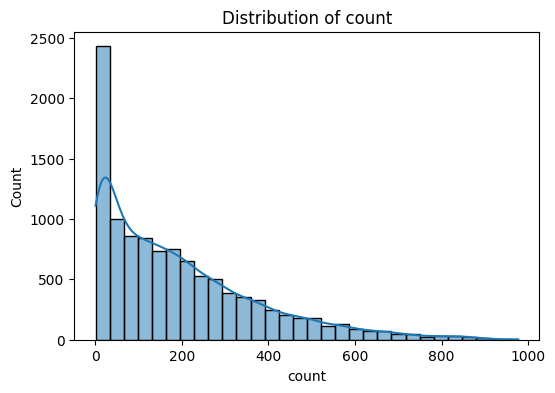

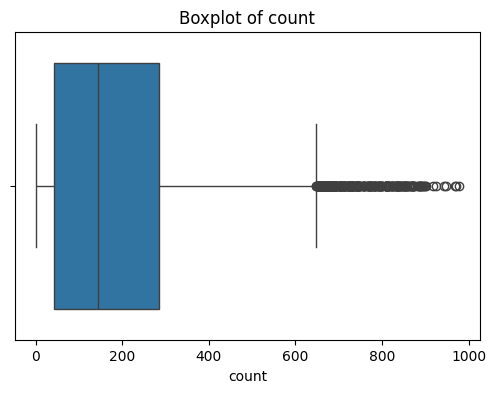

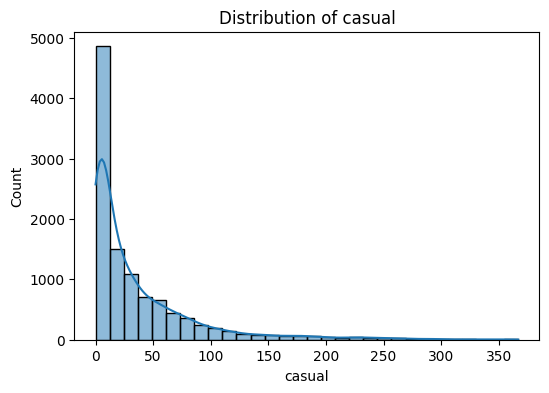

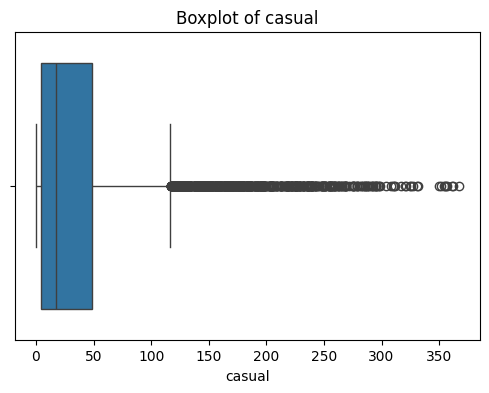

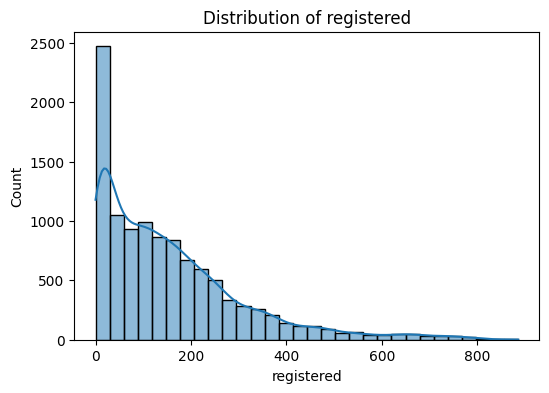

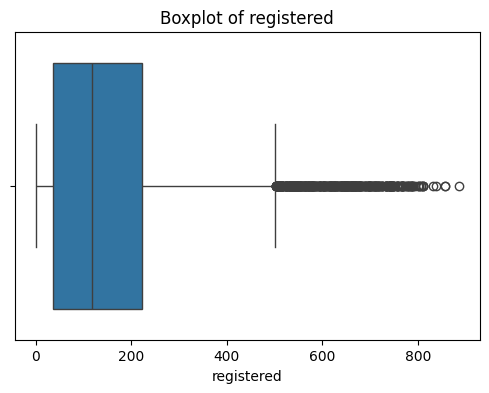

In [11]:
continuous_cols = ['temp','atemp','humidity','windspeed','count','casual','registered']

for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(yulu_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=yulu_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

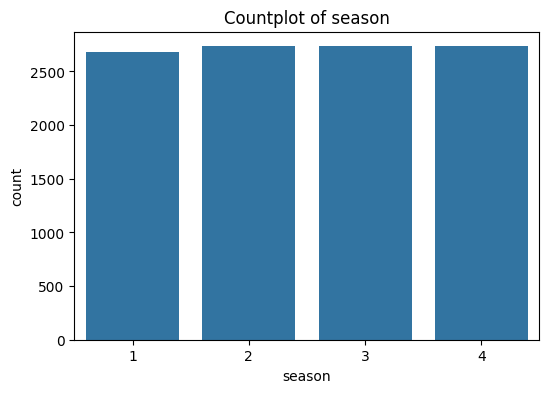

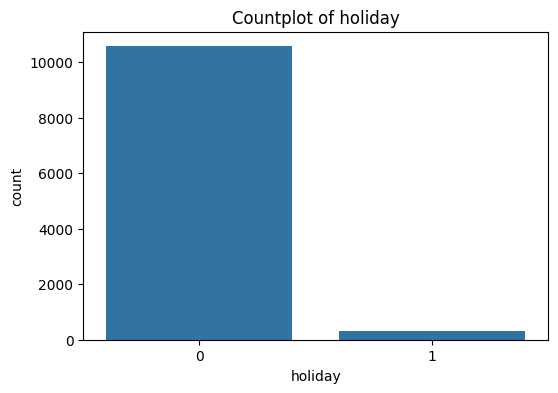

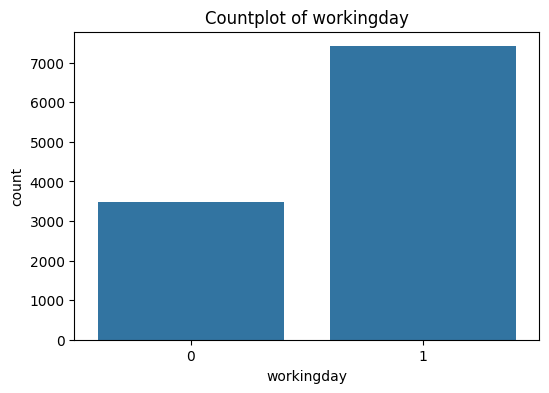

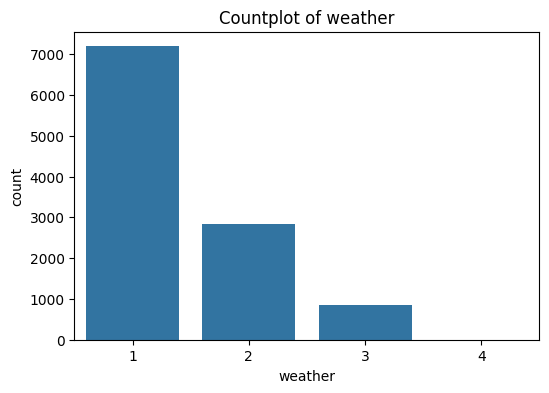

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=yulu_data[col])
    plt.title(f'Countplot of {col}')
    plt.show()

# For Univariate Analysis:

Continuous variables (count, temp, humidity) are analyzed using histograms and KDE plots to understand distribution, skewness, and outliers.

Categorical variables (season, weather, workingday) are analyzed using countplots/barplots to see frequency distribution.

# Bivariate Analysis

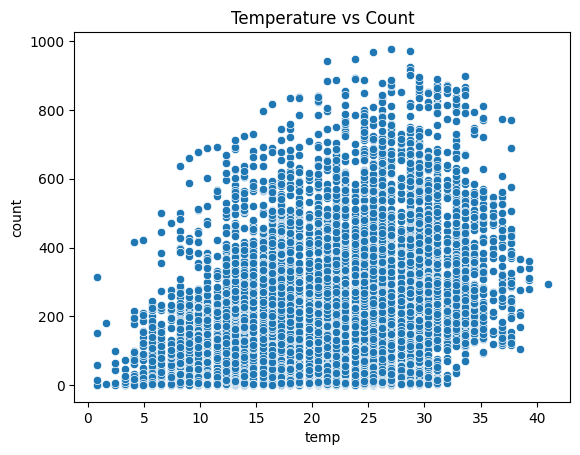

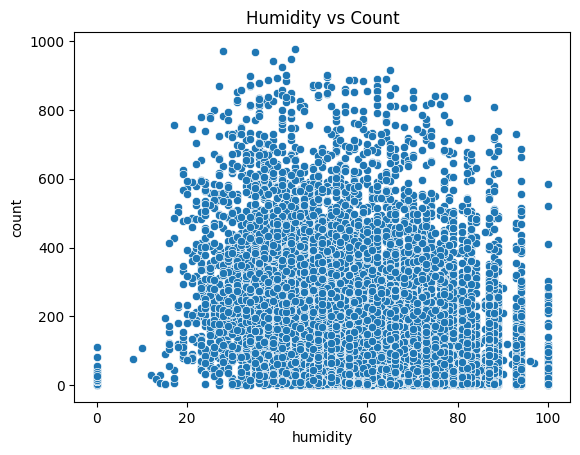

In [13]:
#Continuous vs Dependent (count)
sns.scatterplot(x='temp', y='count', data=yulu_data)
plt.title('Temperature vs Count')
plt.show()

sns.scatterplot(x='humidity', y='count', data=yulu_data)
plt.title('Humidity vs Count')
plt.show()



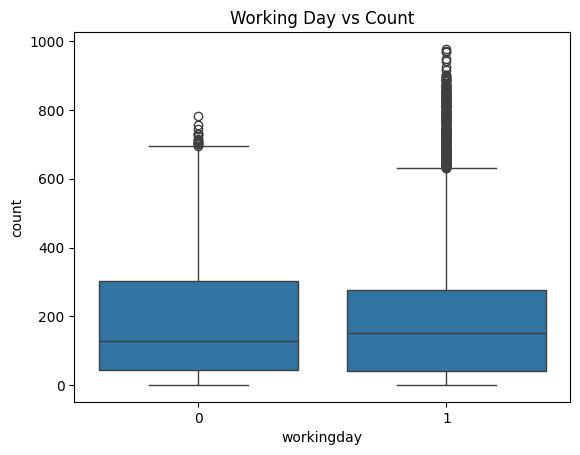

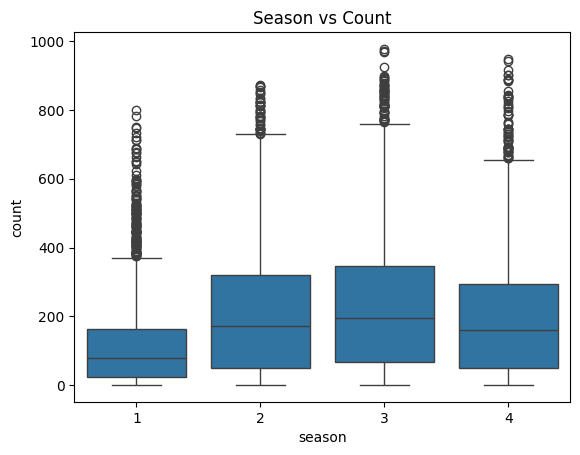

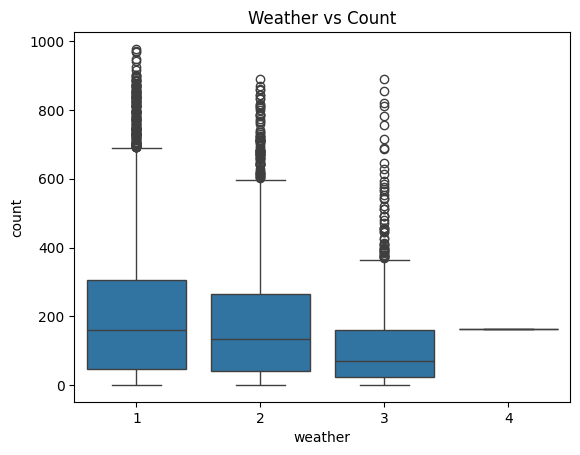

In [14]:
# Categorical vs Dependent (count)
sns.boxplot(x='workingday', y='count', data=yulu_data)
plt.title('Working Day vs Count')
plt.show()

sns.boxplot(x='season', y='count', data=yulu_data)
plt.title('Season vs Count')
plt.show()

sns.boxplot(x='weather', y='count', data=yulu_data)
plt.title('Weather vs Count')
plt.show()


# For Bivariate Analysis:

Boxplots/scatterplots are used to examine the relationship between independent and dependent variables.

Example: workingday vs count → To check if rentals are higher on working days.

Example: season vs count → To see seasonal trends in rentals.

# Interpretation Theory Example:

Outliers in count may indicate unusually high demand days.

Rentals are expected to be higher on clear weather days and during certain seasons.

# Hypothesis Testing

#Sample T-Test: Working Day Effect

In [28]:
# Hypotheses:
# Purpose: Test if the mean rentals differ between working and non-working days.
# H0: No difference in mean count for working day vs non-working day
# H1: Difference exists
workday_count = yulu_data[yulu_data['workingday']==1]['count']
non_workday_count = yulu_data[yulu_data['workingday']==0]['count']

# T-test
t_stat, p_val = stats.ttest_ind(workday_count, non_workday_count)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 1.2096277376026694, P-value: 0.22644804226361348


In [29]:
# T-test result interpretation
alpha = 0.05  # significance level

if p_val < alpha:
    print(f"P-value = {p_val:.4f} < {alpha} -> Reject H0")
    print("Inference: Working day significantly affects the number of rentals.")
else:
    print(f"P-value = {p_val:.4f} ≥ {alpha} -> Fail to reject H0")
    print("Inference: No significant difference in rentals between working days and non-working days.")


P-value = 0.2264 ≥ 0.05 -> Fail to reject H0
Inference: No significant difference in rentals between working days and non-working days.


In [36]:
from scipy.stats import shapiro
# Normality (Shapiro-Wilk)
shapiro_workday = shapiro(workday_count.sample(500, random_state=42))
shapiro_nonworkday = shapiro(non_workday_count.sample(500, random_state=42))
print("Shapiro-Wilk Test for Working Day:", shapiro_workday)
print("Shapiro-Wilk Test for Non-Working Day:", shapiro_nonworkday)

Shapiro-Wilk Test for Working Day: ShapiroResult(statistic=np.float64(0.8723803976429698), pvalue=np.float64(8.020070098537695e-20))
Shapiro-Wilk Test for Non-Working Day: ShapiroResult(statistic=np.float64(0.867359447614823), pvalue=np.float64(3.4189745013780254e-20))


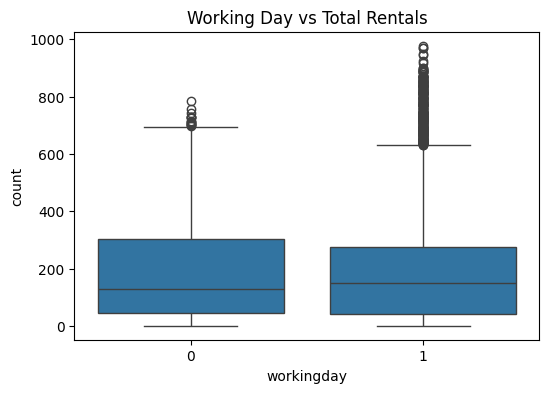

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='workingday', y='count', data=yulu_data)
plt.title("Working Day vs Total Rentals")
plt.show()


#ANOVA: Season & Weather Effect

In [42]:
#Hypotheses:
#Purpose: Test if mean rentals differ across multiple groups (seasons or weather conditions).
#Season: H0 = mean count same across seasons; H1 = differs
#Season ANOVA

season_groups = [yulu_data[yulu_data['season']==cat]['count'] for cat in yulu_data['season'].unique()]
f_stat, p_val = stats.f_oneway(*season_groups)
print(f"Season ANOVA: F={f_stat}, p={p_val}")

Season ANOVA: F=236.94671081032098, p=6.164843386499654e-149


In [31]:
# Interpretation
alpha = 0.05
if p_val < alpha:
    print(f"P-value = {p_val:.4e} < {alpha} -> Reject H0")
    print("Inference: The number of cycles rented differs significantly across different seasons.")
else:
    print(f"P-value = {p_val:.4e} ≥ {alpha} -> Fail to reject H0")
    print("Inference: No significant difference in the number of cycles rented across seasons.")

P-value = 6.1648e-149 < 0.05 -> Reject H0
Inference: The number of cycles rented differs significantly across different seasons.


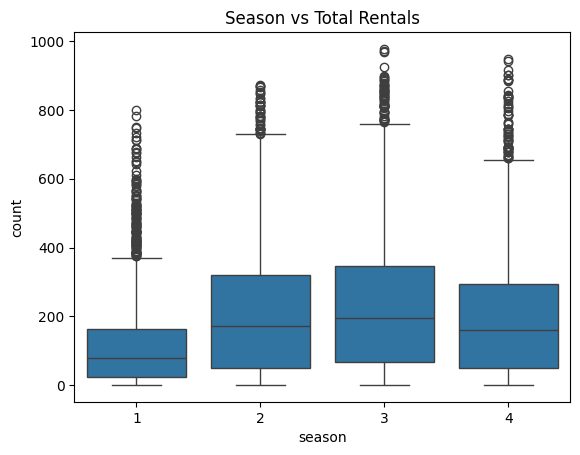

In [39]:
sns.boxplot(x='season', y='count', data=yulu_data)
plt.title("Season vs Total Rentals")
plt.show()


In [32]:
#Weather: H0 = mean count same across weather types; H1 = differs
weather_groups = [yulu_data[yulu_data['weather']==cat]['count'] for cat in yulu_data['weather'].unique()]
f_stat, P_val = stats.f_oneway(*weather_groups)
print(f"Weather ANOVA: F={f_stat}, p={P_val}")

Weather ANOVA: F=65.53024112793265, p=5.482069475935669e-42


In [27]:
# Interpretation
if P_val < alpha:
    print(f"P-value = {P_val:.4e} < {alpha} -> Reject H0")
    print("Inference: The number of cycles rented differs significantly across different weather conditions.")
else:
    print(f"P-value = {P_val:.4e} ≥ {alpha} -> Fail to reject H0")
    print("Inference: No significant difference in rentals across weather conditions.")

P-value = 5.4821e-42 < 0.05 -> Reject H0
Inference: The number of cycles rented differs significantly across different weather conditions.


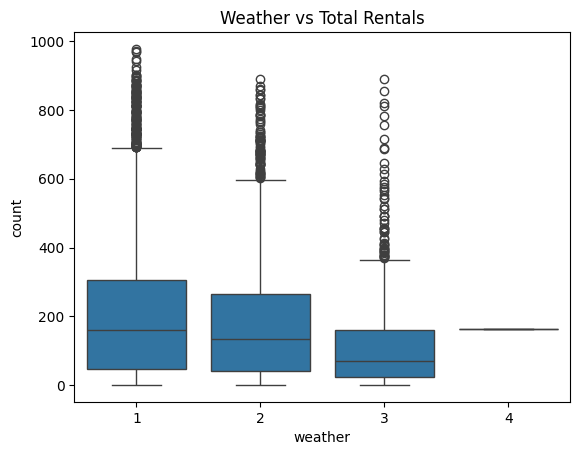

In [40]:
sns.boxplot(x='weather', y='count', data=yulu_data)
plt.title("Weather vs Total Rentals")
plt.show()


#Chi-Square Test: Weather vs Season

In [43]:
#Hypothesis:
#Purpose: Test if two categorical variables are independent.
#H0: Weather independent of season
#H1: Weather depends on season
contingency_table = pd.crosstab(yulu_data['season'], yulu_data['weather'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 49.158655596893624, p-value: 1.549925073686492e-07


In [34]:
# Interpretation
alpha = 0.05
if p < alpha:
    print(f"P-value = {p:.4e} < {alpha} → Reject H0")
    print("Inference: Weather is dependent on the season.")
else:
    print(f"P-value = {p:.4e} ≥ {alpha} → Fail to reject H0")
    print("Inference: Weather and season are independent.")

P-value = 1.5499e-07 < 0.05 → Reject H0
Inference: Weather is dependent on the season.


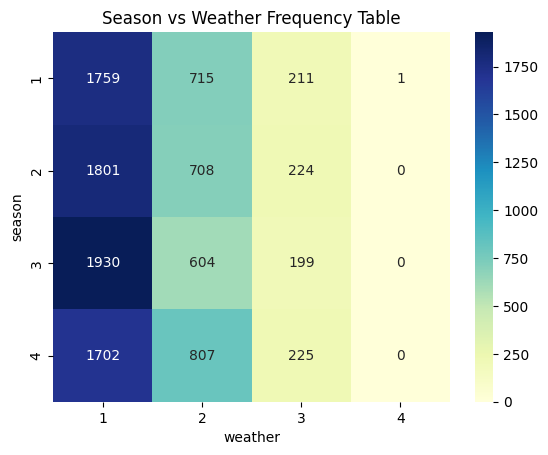

In [41]:
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Season vs Weather Frequency Table")
plt.show()


# 1.  Working Day vs Rentals

T-test p-value = 0.226 → not significant

Observation: Rentals on working days and non-working days are statistically similar.

# 2. Season vs Rentals

ANOVA p-value ≈ 6.16e-149 → highly significant

Observation: Rentals differ across seasons:

Some seasons have higher average rentals than others.

# 3. Weather vs Rentals

ANOVA p-value ≈ 5.48e-42 → highly significant

Observation: Rentals differ by weather condition:

Clear weather shows higher rentals, bad weather shows lower rentals.

# 4. Weather vs Season

Chi-square p-value ≈ 1.55e-07 → significant

Observation: Weather is dependent on season.

# Recommendations

# Seasonal Bike Allocation:

Allocate more bikes during seasons with higher rentals (identified from ANOVA), and reduce during low-demand seasons.

# Weather-based Planning:

Prepare for lower rentals on bad weather days (rain, snow, storms) and focus bike availability on clear weather days.

# Working Day Strategy:

Since working days do not significantly affect rentals (T-test p = 0.226), maintain consistent bike availability throughout the week.

# Operational Efficiency:

Use weather and season insights to optimize bike redistribution, reducing idle bikes and operational costs.

# Data-Driven Monitoring:

Continuously monitor rentals by season and weather to update predictions and make proactive operational decisions.